Universidad Galileo

Text Mining and Image Recognition

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

## Laboratorio No. 1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Problema #1:
Utilice realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

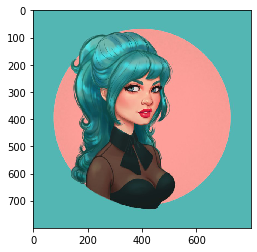

In [2]:
path ="./Problema1/pinup.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

### Canny

True

<Figure size 432x288 with 0 Axes>

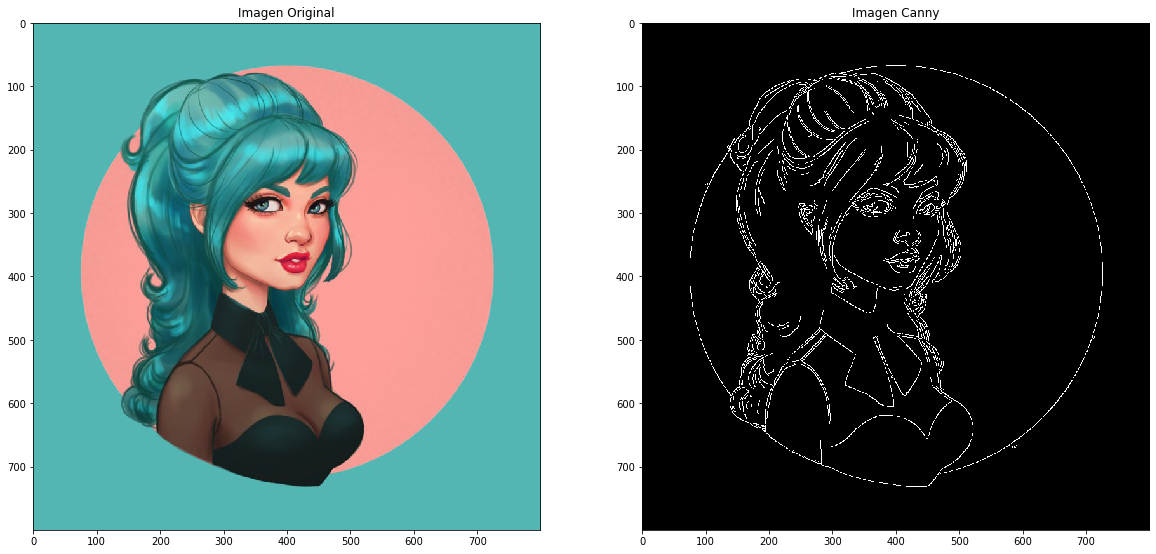

In [3]:
canny_image = cv2.Canny(img,100,200)

# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].title.set_text('Imagen Original')
axarr[0].imshow(img)
axarr[1].title.set_text('Imagen Canny')
axarr[1].imshow(cv2.cvtColor(canny_image,cv2.COLOR_BGR2RGB)) 
cv2.imwrite('./Problema1/canny_image.jpg',canny_image)

### Sobel

True

<Figure size 432x288 with 0 Axes>

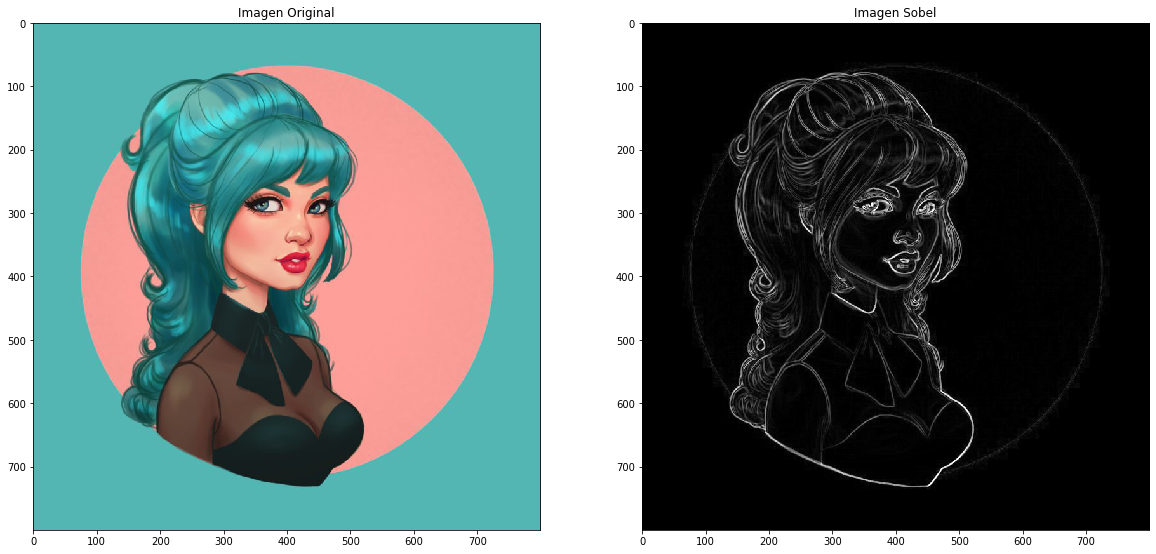

In [4]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
grad_x = cv2.Sobel(gris, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gris, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    
    
# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].title.set_text('Imagen Original')
axarr[0].imshow(img)
axarr[1].title.set_text('Imagen Sobel')
axarr[1].imshow(cv2.cvtColor(grad,cv2.COLOR_BGR2RGB))
cv2.imwrite('./Problema1/sobel_image.jpg',grad)

### Laplaciano

True

<Figure size 432x288 with 0 Axes>

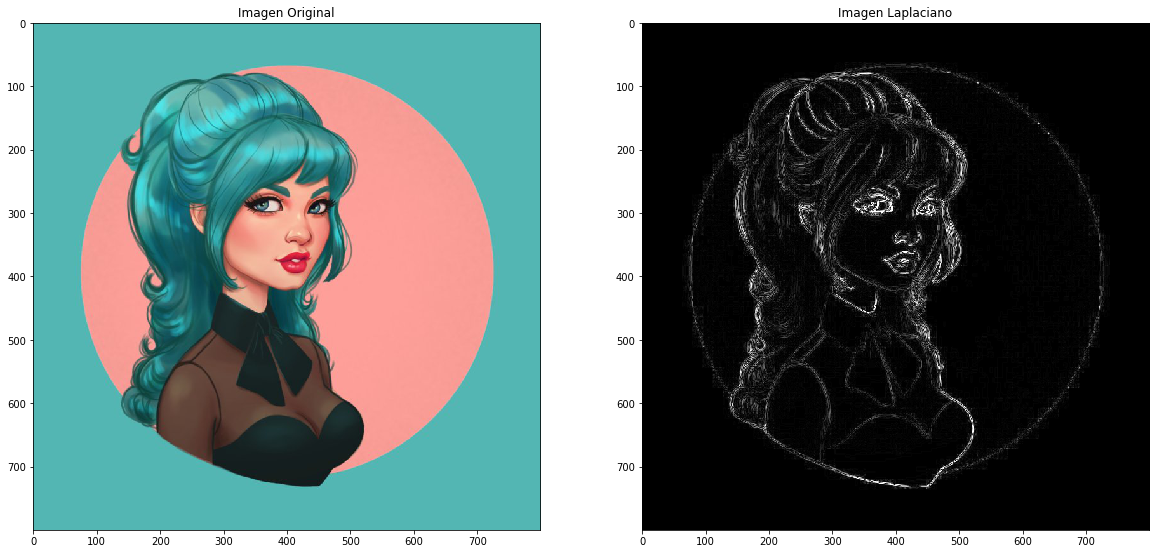

In [5]:
# Declare the variables we are going to use
ddepth = cv2.CV_16S
kernel_size = 3
dst = cv2.Laplacian(gris, ddepth, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)

# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].title.set_text('Imagen Original')
axarr[0].imshow(img)
axarr[1].title.set_text('Imagen Laplaciano')
axarr[1].imshow(cv2.cvtColor(abs_dst,cv2.COLOR_BGR2RGB))
cv2.imwrite('./Problema1/laplace_image.jpg',abs_dst)

#### Comparación Final

<Figure size 432x288 with 0 Axes>

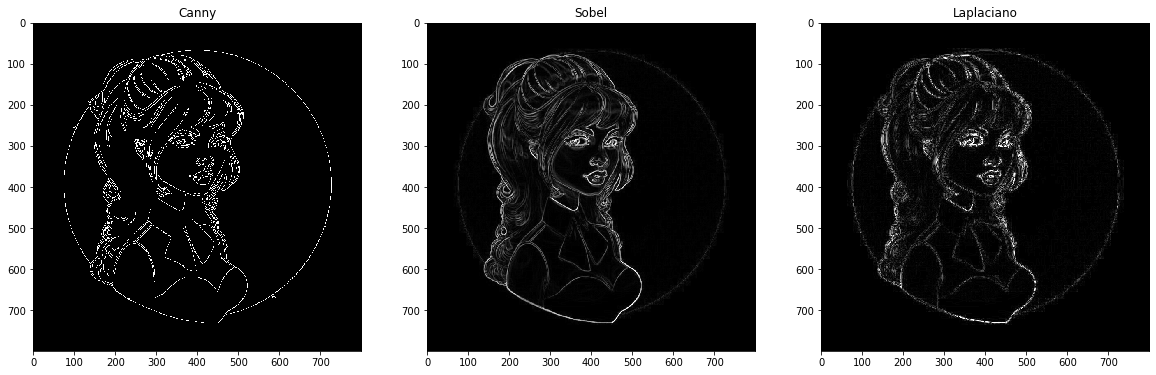

In [6]:
# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,3,figsize=(20,20))
axarr[0].title.set_text('Canny')
axarr[0].imshow(cv2.cvtColor(canny_image,cv2.COLOR_BGR2RGB))
axarr[1].title.set_text('Sobel')
axarr[1].imshow(cv2.cvtColor(grad,cv2.COLOR_BGR2RGB))
axarr[2].title.set_text('Laplaciano')
axarr[2].imshow(cv2.cvtColor(abs_dst,cv2.COLOR_BGR2RGB))


| Característica    |   Canny    | Sobel | Laplaciano |
|----------|----------|------------|           |
| Complejidad de Computo |  Alta   |  Baja   |   Baja  |
| Susceptibilidad a Ruido |  Baja   |  Baja   |   Alta |
| Susceptibilidad a Falsos Bordes |  Baja   |  Alta   |   Media |


- El algoritmo de Canny muestra mejor desempeño en la detección de bordes. Es más complejo computacionalmente pero parece extraer bordes de mejor manera que los otros dos (lo que puede verse con el círculo de la imagen).
- El algoritmo de Sobel (kernel) parece dar un poco más de detalle, que puede verse en el pelo de la mujer, pero muestra un desempeño débil con bordes suaves o dificiles de detectar.
- El método del Laplaciano (kernel) parece dar resultados más ruidosos. Hay bordes que se muestran menos definidos en la imagen. Probablemente para utilizar este método se requiera aplicar un filtro gaussiano como pre-procesamiento de la imagen.

### Problema #2:
Investigue cual es la diferencia entre un borde y un contorno en OpenCV, posteriormente a esto, determine los bordes y contornos de una misma imagen, para este ejercicio deberá entregar un documento con la descripción de la diferencia entre ambos enfoques y el resultado de obtener
ambos resultados para cualquier imagen que usted desee.

#### Borde:
Los bordes son esencialmente puntos extremos dentro de la imagen. Tienen una significancia local, en el sentido de que da información acerca del pixel y de los pixels que se encuentran vecinos a este. Los algoritmos vistos en clase como Canny o los filtros de convolución con kernels como Sobel y Laplaciano sirven para la detección de bordes basados en tasas de cambio (derivadas o gradientes) en la imagen. La detección de bordes normalmente se utilizan como un pre-procesamiento para otros algoritmos de detección en imágenes, por ejemplo, Rectas utilizado transformada de Hough, o la misma detección de contornos que se explica a continuación.

#### Contornos:
Los contornos es esencialmente una curva que une todos los puntos continuos a lo largo de un perímetro, los cuales tienen el mismo color y la misma intensidad. Esto es útil para las detecciones de forma, detección y reconocimiento de objetos. Muchos contornos se obtienen a partir de bordes, y cuando esto ocurre, se deben conectar bordes para formar un contorno. La idea principal es que los contornos están asociados a un objeto, y por este motivo son en general curvas más cerradas al compararlas con los bordes simples.

- Debido a que los contornos unen puntos que tienen el mismo color y misma intensidad a lo largo de un perímetro, se recomienda aplicar un umbral o un algoritmo de detección de bordes (como Canny) previo a la detección de contornos.
- En OpenCV se utiliza la función **findContours** para poder encontrar los contornos de la imagen que se obtienen como arreglos de Numpy de forma jerárquica (especificado en la salida jerarquía de esta función). Se especifican parámetros como el modo de recuperación de los contornos y el método de aproximación de los contornos.
- En OpenCV se utiliza la función **drawContours**. Se le especifica la imagen y los contornos. Estos contornos se le pasan como una lista de Python, y un índice para los contornos (se coloca -1 si se requiere mostrar todos los contornos). También se especifican el color (BGR) y el ancho del contorno.


In [7]:
## Añadir Contornos a Imagen
path ="./Problema2/bombshell.jpg"
imagen = cv2.imread(path)
imagen_gris = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
ret,umbral = cv2.threshold(imagen_gris,127,255,0)
contours, hierarchy = cv2.findContours(umbral,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
path ="./Problema2/black.jpg"
negro = cv2.imread(path)
contornos = cv2.drawContours(negro, contours, -1, (255,255,255), 1)
cv2.imwrite('./Problema2/contour_image.jpg',contornos)

True

<Figure size 432x288 with 0 Axes>

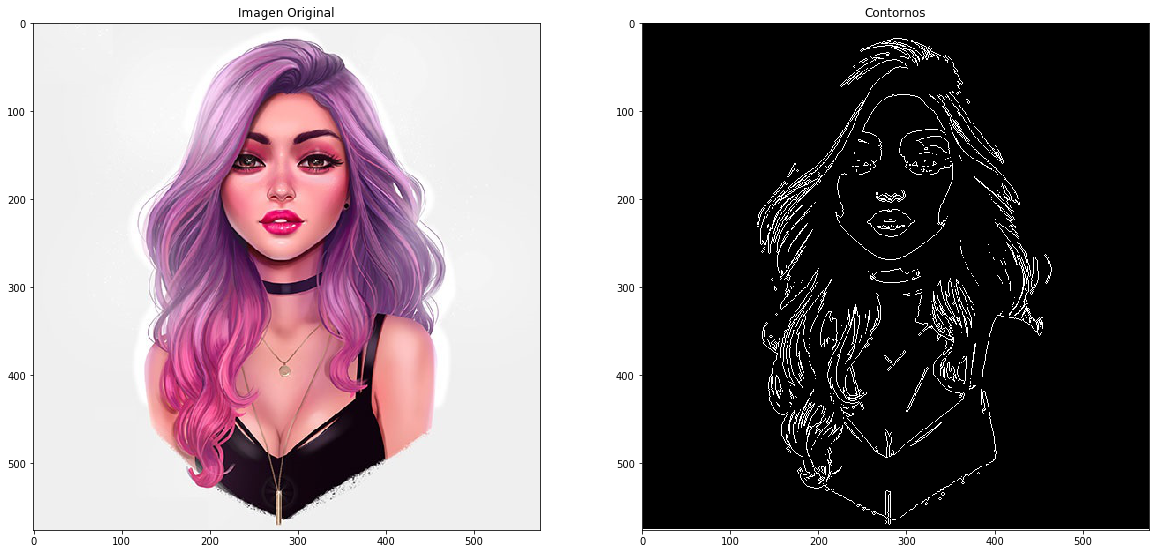

In [8]:
path ="./Problema2/bombshell.jpg"
imagen = cv2.imread(path)
# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].title.set_text('Imagen Original')
axarr[0].imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
axarr[1].title.set_text('Contornos')
axarr[1].imshow(cv2.cvtColor(contornos,cv2.COLOR_BGR2RGB)) 

<Figure size 432x288 with 0 Axes>

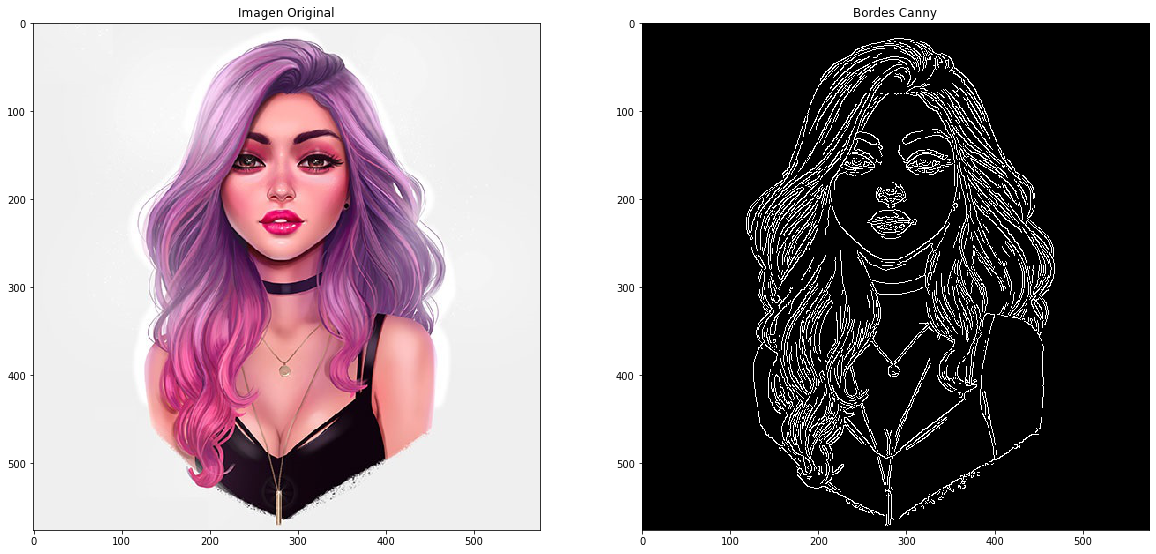

In [9]:
canny_image = cv2.Canny(imagen,100,200)
cv2.imwrite('./Problema2/border_image.jpg',canny_image)

# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].title.set_text('Imagen Original')
axarr[0].imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
axarr[1].title.set_text('Bordes Canny')
axarr[1].imshow(cv2.cvtColor(canny_image,cv2.COLOR_BGR2RGB))

### Problema #3:
Dadas las imágenes en la carpeta llamada campos utilice la transformada de Hough para dibujar la mayor cantidad de líneas rectas posibles en cada imagen, para este ejercicio puede utilizar las funciones de OpenCV disponibles sobre la transformada de Hough.

In [10]:
def hough_img1(img):
    imagen = img.copy()
    escala_grises = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    bordes = cv2.Canny(escala_grises,100,200,apertureSize = 3)
               
    lines = cv2.HoughLines(bordes,1,np.pi/180,120)
    
    for i in np.arange(lines.shape[0]):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 800*(-b))
            y1 = int(y0 + 800*(a))
            x2 = int(x0 - 800*(-b))
            y2 = int(y0 - 800*(a))

            cv2.line(imagen,(x1,y1),(x2,y2),(0,0,255),2)
    
    return imagen

<Figure size 432x288 with 0 Axes>

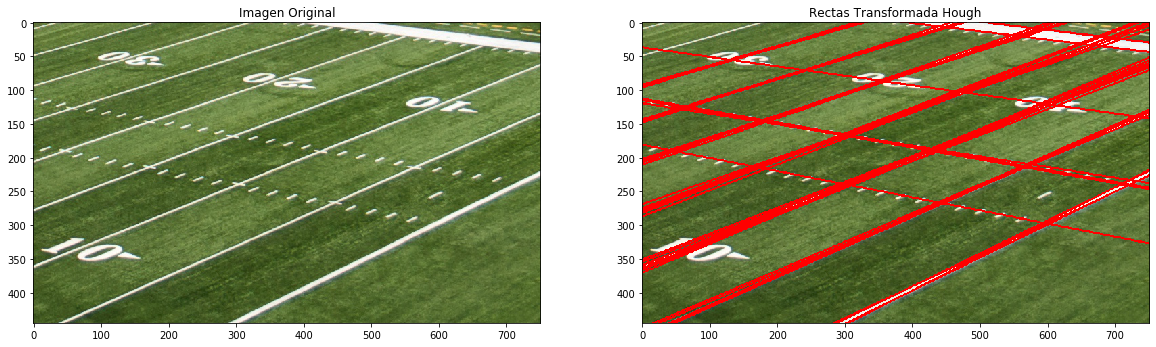

In [11]:
# Lectura de Imagenes en Carpeta "Campos"
path ="./campos/campo1.jpg"
img = cv2.imread(path)
imagen_hough=hough_img1(img)
cv2.imwrite('./Problema3/hough_campo1.jpg',imagen_hough)

# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].title.set_text('Imagen Original')
axarr[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
axarr[1].title.set_text('Rectas Transformada Hough')
axarr[1].imshow(cv2.cvtColor(imagen_hough,cv2.COLOR_BGR2RGB))

In [12]:
def hough_img2(img):
    imagen = img.copy()
    escala_grises = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    bordes = cv2.Canny(escala_grises,100,300,apertureSize = 3)
               
    lines = cv2.HoughLines(bordes,1,np.pi/180,80)
    
    for i in np.arange(lines.shape[0]):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 400*(-b))
            y1 = int(y0 + 400*(a))
            x2 = int(x0 - 400*(-b))
            y2 = int(y0 - 400*(a))

            cv2.line(imagen,(x1,y1),(x2,y2),(0,0,255),1)
    
    return imagen

<Figure size 432x288 with 0 Axes>

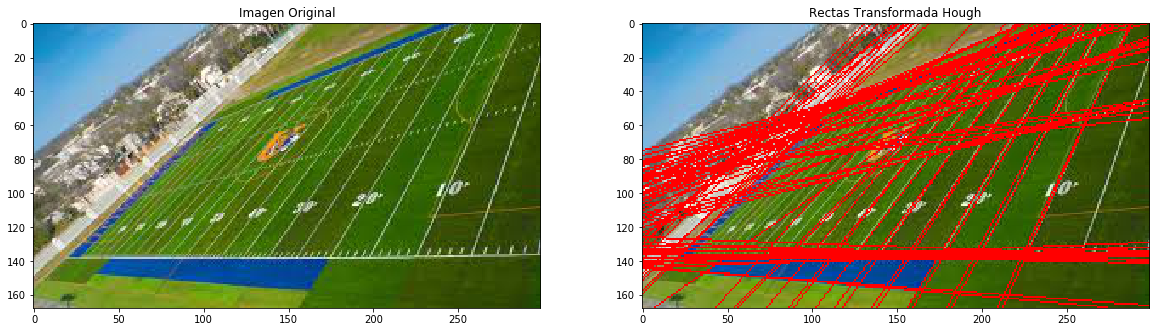

In [13]:
# Lectura de Imagenes en Carpeta "Campos"
path ="./campos/campo2.jpg"
img = cv2.imread(path)
imagen_hough=hough_img2(img)
cv2.imwrite('./Problema3/hough_campo2.jpg',imagen_hough)

# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].title.set_text('Imagen Original')
axarr[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
axarr[1].title.set_text('Rectas Transformada Hough')
axarr[1].imshow(cv2.cvtColor(imagen_hough,cv2.COLOR_BGR2RGB))

In [14]:
def hough_img3(img):
    imagen = img.copy()
    escala_grises = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    bordes = cv2.Canny(escala_grises,100,400,apertureSize = 3)
               
    lines = cv2.HoughLines(bordes,1,np.pi/180,100)
    
    for i in np.arange(lines.shape[0]):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 400*(-b))
            y1 = int(y0 + 400*(a))
            x2 = int(x0 - 400*(-b))
            y2 = int(y0 - 400*(a))

            cv2.line(imagen,(x1,y1),(x2,y2),(0,0,255),1)
    
    return imagen

<Figure size 432x288 with 0 Axes>

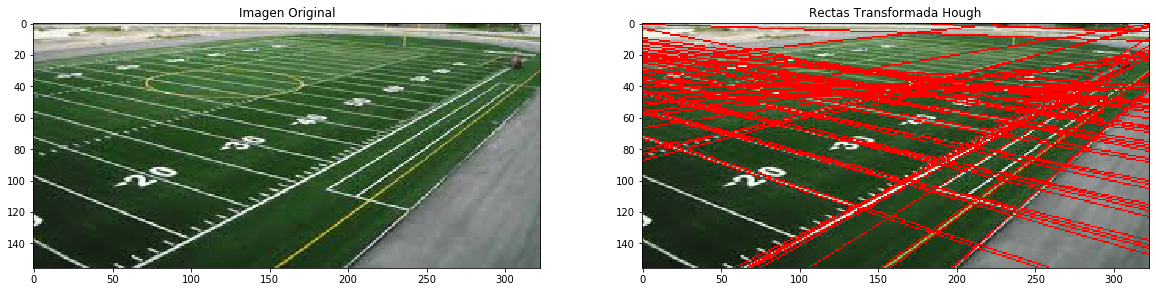

In [15]:
# Lectura de Imagenes en Carpeta "Campos"
path ="./campos/campo3.jpg"
img = cv2.imread(path)
imagen_hough=hough_img3(img)
cv2.imwrite('./Problema3/hough_campo3.jpg',imagen_hough)

# Comparación Gráfica
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].title.set_text('Imagen Original')
axarr[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
axarr[1].title.set_text('Rectas Transformada Hough')
axarr[1].imshow(cv2.cvtColor(imagen_hough,cv2.COLOR_BGR2RGB))